   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


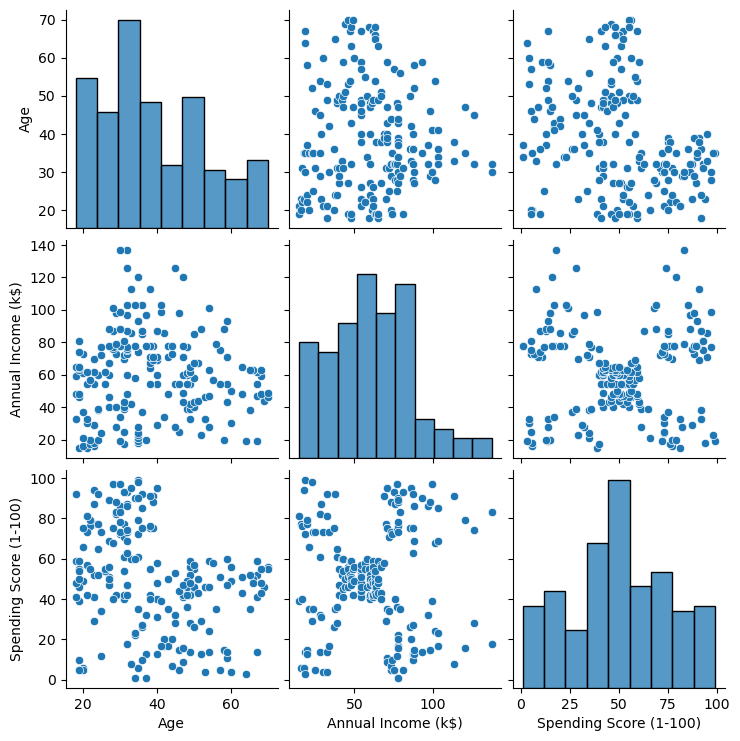

Gender
Female    112
Male       88
Name: count, dtype: int64


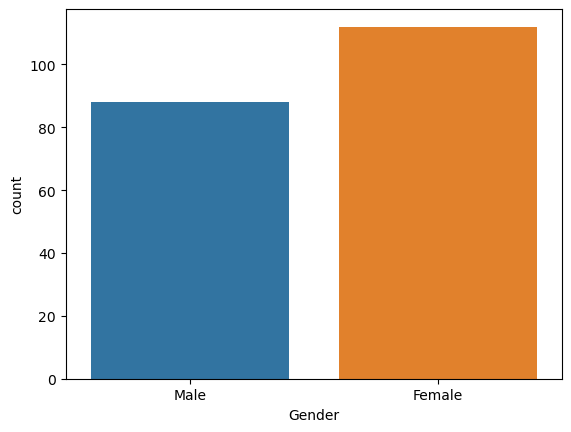

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


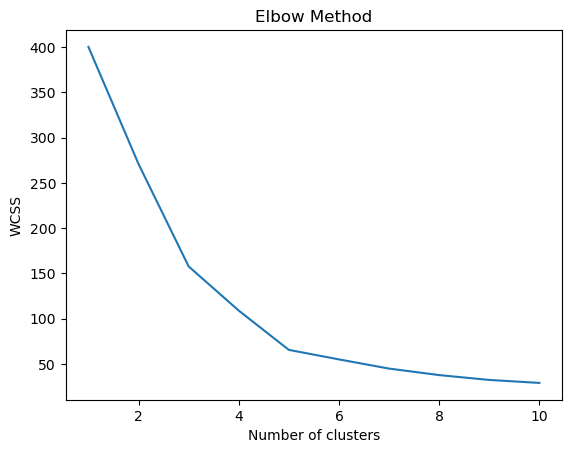

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
Silhouette Score: 0.46658474419000145
Calinski-Harabasz Index: 151.33512126359477


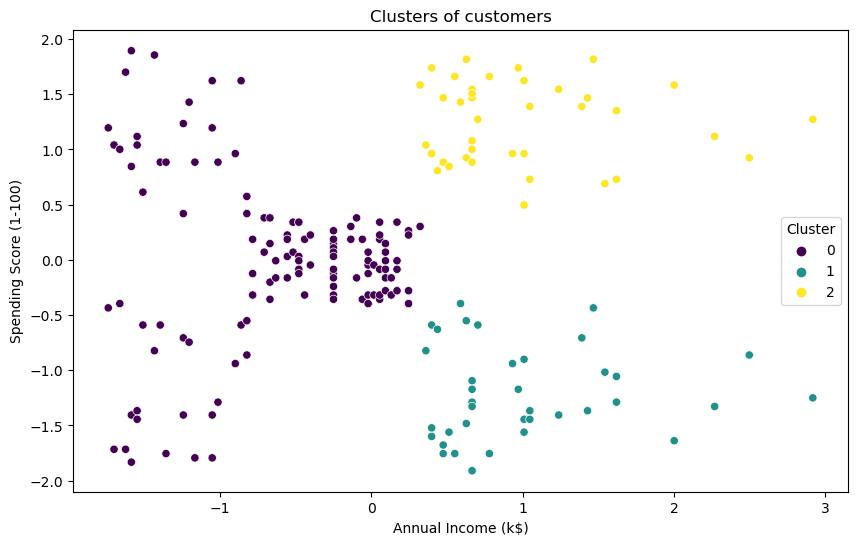

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Leer datos desde archivo CSV
data = pd.read_csv('Mall_Customers.csv')

# Visualizar los primeros registros
print(data.head())

# Información general de los datos
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Distribución de las variables numéricas
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Conteo de valores categóricos
print(data['Gender'].value_counts())

# Gráficas de distribución
sns.countplot(x='Gender', data=data)
plt.show()

# Convertir variables categóricas a numéricas
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Verificar valores faltantes
print(data.isnull().sum())

# Escalar datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# DataFrame visualización
data_scaled = pd.DataFrame(data_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Selección de características
X = data_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]

# Número adecuado de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenar el modelo con el número adecuado de clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Añadir las etiquetas de cluster al dataframe original
data['Cluster'] = kmeans.labels_
print(data.head())

# Coeficiente de Silhouette
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Índice de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(X, kmeans.labels_)
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=data['Cluster'], palette='viridis', legend='full')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
